City of Los Angeles crime data from 2020 to current date

### Problem statement: Find out the area where the crime rate is higher and where the los angeles coup should priortize highly

In [462]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [463]:
df = pd.read_csv("/Users/mrbinit/Downloads/Crime_Data_from_2020_to_Present.csv")

In [464]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [465]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [466]:
df.shape

(770787, 28)

In [467]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770787 entries, 0 to 770786
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           770787 non-null  int64  
 1   Date Rptd       770787 non-null  object 
 2   DATE OCC        770787 non-null  object 
 3   TIME OCC        770787 non-null  int64  
 4   AREA            770787 non-null  int64  
 5   AREA NAME       770787 non-null  object 
 6   Rpt Dist No     770787 non-null  int64  
 7   Part 1-2        770787 non-null  int64  
 8   Crm Cd          770787 non-null  int64  
 9   Crm Cd Desc     770787 non-null  object 
 10  Mocodes         664916 non-null  object 
 11  Vict Age        770787 non-null  int64  
 12  Vict Sex        669964 non-null  object 
 13  Vict Descent    669958 non-null  object 
 14  Premis Cd       770778 non-null  float64
 15  Premis Desc     770334 non-null  object 
 16  Weapon Used Cd  268001 non-null  float64
 17  Weapon Des

In [468]:
# Assuming you have a DataFrame called 'df' with the original column names
original_columns = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
                   'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
                   'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
                   'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
                   'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
                   'LON']

# New column names you want to set
new_columns = ['DR_NUMBER', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area', 'Area_Name',
               'Report_District_Number', 'Part_Type', 'Crime_Code', 'Crime_Description', 'Modcodes',
               'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premises_Code', 'Premises_Description',
               'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Code_1',
               'Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Location', 'Cross_Street', 'Latitude',
               'Longitude']

# Rename the columns
df.columns = new_columns

In [469]:
df.head(10)

,DR_NUMBER,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Code,Crime_Description,...,Status,Status_Description,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,Latitude,Longitude
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [470]:
df.Modcodes.value_counts()

Modcodes
0344                             31796
0329                             17462
1822 0344                         9166
1501                              7688
0344 1822                         6550
                                 ...  
0421 0913 1814 1300                  1
0945 0344 0325 0416 0444             1
0913 2000 0906 1816 0444 0408        1
0400 0444 1300 2004 1822             1
0601 0445 0416 0359                  1
Name: count, Length: 258897, dtype: int64

In [471]:
df = df.drop(['DR_NUMBER', 'Status', 'Status_Description','Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Crime_Code', 'Victim_Sex', 'Premises_Code','Weapon_Used_Code','Victim_Age', 'Location', 'Modcodes'], axis = 1)

In [472]:
df.head(10)

,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1
0,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0
1,01/01/2020 12:00:00 AM,330,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0
2,02/13/2020 12:00:00 AM,1200,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0
4,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0
5,01/01/2020 12:00:00 AM,30,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0
6,01/02/2020 12:00:00 AM,1315,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0
7,01/04/2020 12:00:00 AM,40,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0
8,01/04/2020 12:00:00 AM,200,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0
9,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0


In [473]:

from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%Y-%m-%d %H:%M:%S')
        return regular_time
    except ValueError:
        return military_time

# Convert military times to regular times in the Time_Occurred column
df['Date_Occurred'] = df['Date_Occurred'].apply(military_to_regular_time)
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])
df['Mnth'] = df['Date_Occurred'].dt.month
df['Day_of_week'] = df['Date_Occurred'].dt.day_name()



/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_5646/3571419508.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])


In [474]:
df = df.drop('Date_Occurred', axis = 1)

### Converting military time

In [475]:
from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%H:%M')
        return regular_time
    except ValueError:
        return military_time


# Convert military times to regular times in the Time_Occurred column
df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)

In [476]:
df.Time_Occurred.head(10)

0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
5    03:00
6    13:15
7    04:00
8    20:00
9    19:25
Name: Time_Occurred, dtype: object

### Handling month

In [477]:
def month_name(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

df['Month'] = df['Mnth'].apply(month_name)


In [478]:
df = df.drop('Mnth', axis = 1)

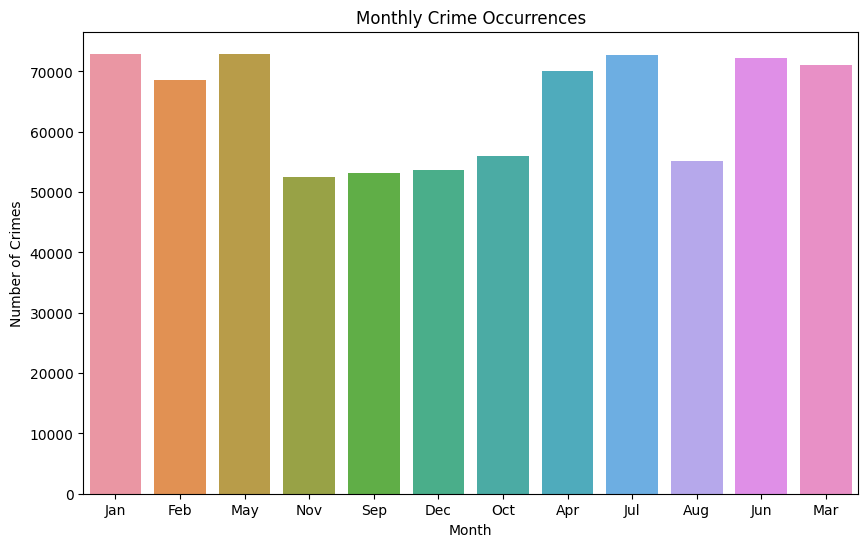

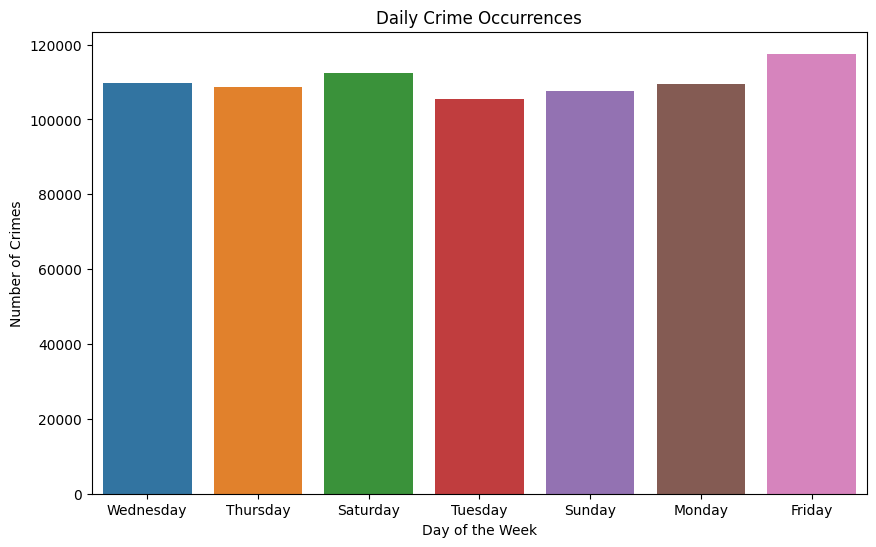

In [479]:

# Plot crime occurrences by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data= df)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Occurrences')
plt.show()


# Plot crime occurrences by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_week', data= df)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Daily Crime Occurrences')
plt.show()


In [480]:
# df.Date_Occurred.head(10)

In [481]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0,Tuesday,May


In [482]:
df.Crime_Description.value_counts()

Crime_Description
VEHICLE - STOLEN                                           82396
BATTERY - SIMPLE ASSAULT                                   61108
THEFT OF IDENTITY                                          49522
BURGLARY FROM VEHICLE                                      47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47210
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [483]:
df.Weapon_Description.value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    143872
UNKNOWN WEAPON/OTHER WEAPON                        27958
VERBAL THREAT                                      19672
HAND GUN                                           16645
SEMI-AUTOMATIC PISTOL                               6101
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [484]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0,Tuesday,May


In [485]:
df.head()

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan


In [486]:
df.Area.value_counts()

Area
1     51734
12    48756
14    45097
3     42996
6     41066
18    39480
20    39024
13    38409
15    38326
7     36469
2     35766
8     35433
11    33290
9     32756
10    32240
5     31962
17    31241
21    31230
19    30694
4     28947
16    25871
Name: count, dtype: int64

In [487]:
df.Area_Name.value_counts()

Area_Name
Central        51734
77th Street    48756
Pacific        45097
Southwest      42996
Hollywood      41066
Southeast      39480
Olympic        39024
Newton         38409
N Hollywood    38326
Wilshire       36469
Rampart        35766
West LA        35433
Northeast      33290
Van Nuys       32756
West Valley    32240
Harbor         31962
Devonshire     31241
Topanga        31230
Mission        30694
Hollenbeck     28947
Foothill       25871
Name: count, dtype: int64

In [488]:
df.Report_District_Number.value_counts()   # remove 

Report_District_Number
162     4108
645     3887
182     3638
1494    3437
646     3367
        ... 
697        1
945        1
728        1
226        1
1046       1
Name: count, Length: 1199, dtype: int64

In [489]:
df = df.drop('Report_District_Number', axis = 1)

In [490]:
df.Part_Type.value_counts()

Part_Type
1    450833
2    319954
Name: count, dtype: int64

### Crime description 

In [491]:
df.Crime_Description.value_counts() # generic bucket

Crime_Description
VEHICLE - STOLEN                                           82396
BATTERY - SIMPLE ASSAULT                                   61108
THEFT OF IDENTITY                                          49522
BURGLARY FROM VEHICLE                                      47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47210
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [492]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Crime_Description'
    return data
df = group_low_value_counts(df, column_name = 'Crime_Description', threshold = 1000)
bn = df.Crime_Description.value_counts()
bn

Crime_Description
VEHICLE - STOLEN                                            82396
BATTERY - SIMPLE ASSAULT                                    61108
THEFT OF IDENTITY                                           49522
BURGLARY FROM VEHICLE                                       47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     47210
BURGLARY                                                    46840
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              44328
THEFT PLAIN - PETTY ($950 & UNDER)                          39357
INTIMATE PARTNER - SIMPLE ASSAULT                           38857
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             29923
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         28284
ROBBERY                                                     26391
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    24847
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    21023
Others_Crime_Description                                  

In [493]:
# Create a mapping of crime types to genres
crime_genre_mapping = {
    'VEHICLE - STOLEN': 'Theft',
    'BATTERY - SIMPLE ASSAULT': 'Assault',
    'THEFT OF IDENTITY': 'Identity Theft',
    'BURGLARY FROM VEHICLE': 'Burglary',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Vandalism',
    'BURGLARY': 'Burglary',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Assault',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft',
    'ROBBERY': 'Robbery',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Vandalism',
    'Others_Crime_Description': 'Other',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Assault',
    'BRANDISH WEAPON': 'Assault',
    'TRESPASSING': 'Other',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Assault',
    'VIOLATION OF RESTRAINING ORDER': 'Other',
    'BIKE - STOLEN': 'Theft',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Other',
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'VIOLATION OF COURT ORDER': 'Other',
    'BUNCO, GRAND THEFT': 'Theft',
    'ATTEMPTED ROBBERY': 'Robbery',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft',
    'OTHER ASSAULT': 'Assault',
    'THEFT, PERSON': 'Theft',
    'BATTERY WITH SEXUAL CONTACT': 'Assault',
    'BURGLARY, ATTEMPTED': 'Burglary',
    'RAPE, FORCIBLE': 'Sexual Assault',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Theft',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Assault',
    'DOCUMENT FORGERY / STOLEN FELONY': 'Forgery',
    'VEHICLE - ATTEMPT STOLEN': 'Theft',
    'CONTEMPT OF COURT': 'Other',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Firearms',
    'ARSON': 'Arson',
    'BATTERY POLICE (SIMPLE)': 'Assault',
    'PICKPOCKET': 'Theft',
    'BUNCO, PETTY THEFT': 'Theft',
    'EXTORTION': 'Other',
    'SHOTS FIRED AT INHABITED DWELLING': 'Firearms',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Theft',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Assault',
    'CRIMINAL HOMICIDE': 'Homicide',
    'DISTURBING THE PEACE': 'Other',
    'FAILURE TO YIELD': 'Other',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Sexual Assault',

}

# Apply the mapping to create a new 'Crime_Genre' column
df['Crime_Genre'] = df['Crime_Description'].map(crime_genre_mapping)

df = df.drop('Crime_Description', axis = 1)


In [494]:
df.Crime_Genre.value_counts()

Crime_Genre
Theft             251139
Assault           196189
Burglary           97493
Vandalism          68233
Other              63839
Identity Theft     49522
Robbery            30406
Sexual Assault      4161
Firearms            3676
Forgery             2673
Arson               2139
Homicide            1317
Name: count, dtype: int64

In [495]:
df.Crime_Genre.isnull().sum()

0

In [496]:
df.Crime_Genre.head(10)

0           Assault
1           Assault
2             Other
3         Vandalism
4         Vandalism
5    Sexual Assault
6             Theft
7             Other
8             Theft
9             Theft
Name: Crime_Genre, dtype: object

### need to make these


In [497]:
df.Victim_Descent.value_counts() 

Victim_Descent
H    236645
W    157945
B    110452
X     73277
O     61052
A     16826
K      4093
F      3217
C      2908
J      1076
V       777
I       739
Z       385
P       209
U       158
D        54
G        51
L        48
S        44
-         2
Name: count, dtype: int64

In [498]:
# Remove the row with '-' value from the DataFrame
df = df[df['Victim_Descent'] != '-']

# Display the updated value counts after removing the '-' row
print(df['Victim_Descent'].value_counts())

Victim_Descent
H    236645
W    157945
B    110452
X     73277
O     61052
A     16826
K      4093
F      3217
C      2908
J      1076
V       777
I       739
Z       385
P       209
U       158
D        54
G        51
L        48
S        44
Name: count, dtype: int64


In [499]:
df.Victim_Descent.isnull().sum()

100829

In [500]:
# Create a mapping of original values to new labels
victim_descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

# Replace the values in the 'Victim_Descent' column using the mapping
df['Victim_Descent'] = df['Victim_Descent'].map(victim_descent_mapping)

# Display the value counts after the mapping
print(df['Victim_Descent'].value_counts())

Victim_Descent
Hispanic/Latin/Mexican            236645
White                             157945
Black                             110452
Unknown                            73277
Other                              61052
Other Asian                        16826
Korean                              4093
Filipino                            3217
Chinese                             2908
Japanese                            1076
Vietnamese                           777
American Indian/Alaskan Native       739
Asian Indian                         385
Pacific Islander                     209
Hawaiian                             158
Cambodian                             54
Guamanian                             51
Laotian                               48
Samoan                                44
Name: count, dtype: int64


In [501]:
# Create a mapping to combine specified categories into 'Asian'
asian_mapping = {
    'Other Asian': 'Asian',
    'Asian Indian': 'Asian',
    'Korean': 'Asian',
    'Filipino': 'Asian',
    'Chinese': 'Asian',
    'Japanese': 'Asian',
    'Vietnamese': 'Asian',
    'Cambodian': 'Asian',
    'Laotian': 'Asian'
}

# Apply the mapping to create a new 'Victim_Descent' column with combined categories
df['Victim_Descent'] = df['Victim_Descent'].replace(asian_mapping)

# Display the updated value counts for the new combined category
print(df['Victim_Descent'].value_counts())


Victim_Descent
Hispanic/Latin/Mexican            236645
White                             157945
Black                             110452
Unknown                            73277
Other                              61052
Asian                              29384
American Indian/Alaskan Native       739
Pacific Islander                     209
Hawaiian                             158
Guamanian                             51
Samoan                                44
Name: count, dtype: int64


In [502]:
# Create a mapping to combine specified categories into 'Other_Victim_Descent'
other_mapping = {
    'Other': 'Other_Victim_Descent',
    'American Indian/Alaskan Native': 'Other_Victim_Descent',
    'Guamanian': 'Other_Victim_Descent',
    'Pacific Islander': 'Other_Victim_Descent',
    'Hawaiian': 'Other_Victim_Descent',
    'Samoan': 'Other_Victim_Descent'
}

# Apply the mapping to create a new 'Victim_Descent' column with combined categories
df['Victim_Descent_Combined'] = df['Victim_Descent'].replace(other_mapping)

# Display the updated value counts for the new combined category
print(df['Victim_Descent_Combined'].value_counts())


Victim_Descent_Combined
Hispanic/Latin/Mexican    236645
White                     157945
Black                     110452
Unknown                    73277
Other_Victim_Descent       62253
Asian                      29384
Name: count, dtype: int64


In [503]:
df.Victim_Descent.isnull().sum()

100829

### Premises Description


In [504]:
df.Premises_Description.value_counts()

Premises_Description
STREET                                          194193
SINGLE FAMILY DWELLING                          130927
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     94852
PARKING LOT                                      54444
OTHER BUSINESS                                   36062
                                                 ...  
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
DEPT OF DEFENSE FACILITY                             1
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: count, Length: 306, dtype: int64

In [505]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Premises_Description'
    return data
df = group_low_value_counts(df, column_name = 'Premises_Description', threshold = 1000)
bn = df.Premises_Description.value_counts()
bn

Premises_Description
STREET                                                      194193
SINGLE FAMILY DWELLING                                      130927
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)                 94852
PARKING LOT                                                  54444
OTHER BUSINESS                                               36062
SIDEWALK                                                     33294
Others_Premises_Description                                  33203
VEHICLE, PASSENGER/TRUCK                                     23086
GARAGE/CARPORT                                               15470
DRIVEWAY                                                     12835
RESTAURANT/FAST FOOD                                          9774
DEPARTMENT STORE                                              8466
PARKING UNDERGROUND/BUILDING                                  6959
OTHER PREMISE                                                 6163
MARKET                                   

In [506]:
df.Premises_Description.isnull().sum()


453

In [507]:
df.Weapon_Description.value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    143872
UNKNOWN WEAPON/OTHER WEAPON                        27958
VERBAL THREAT                                      19672
HAND GUN                                           16645
SEMI-AUTOMATIC PISTOL                               6101
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [508]:
df.Crime_Code_1.value_counts()

Crime_Code_1
510.0    82387
624.0    61385
354.0    49532
330.0    47493
740.0    47298
         ...  
452.0        3
430.0        2
884.0        2
445.0        2
882.0        1
Name: count, Length: 140, dtype: int64

In [509]:
df.columns

Index(['Time_Occurred', 'Area', 'Area_Name', 'Part_Type', 'Victim_Descent',
       'Premises_Description', 'Weapon_Description', 'Crime_Code_1',
       'Day_of_week', 'Month', 'Crime_Genre', 'Victim_Descent_Combined'],
      dtype='object')

In [510]:
df.shape

(770785, 12)

### 

In [511]:
a = len(df.index)/9240
print(a)

83.41829004329004


In [512]:
round(df.isnull().sum()/len(df.index),2)

Time_Occurred              0.00
Area                       0.00
Area_Name                  0.00
Part_Type                  0.00
Victim_Descent             0.13
Premises_Description       0.00
Weapon_Description         0.65
Crime_Code_1               0.00
Day_of_week                0.00
Month                      0.00
Crime_Genre                0.00
Victim_Descent_Combined    0.13
dtype: float64

In [513]:
# dropping the null values in the remaiaining columns as their number is very small 

df.dropna(inplace = True)

In [514]:
round(df.isnull().sum()/len(df.index),2)

Time_Occurred              0.0
Area                       0.0
Area_Name                  0.0
Part_Type                  0.0
Victim_Descent             0.0
Premises_Description       0.0
Weapon_Description         0.0
Crime_Code_1               0.0
Day_of_week                0.0
Month                      0.0
Crime_Genre                0.0
Victim_Descent_Combined    0.0
dtype: float64

In [515]:
# df.shape

In [516]:
# import pandas as pd
# from datetime import datetime

# def military_to_regular_time(military_time):
#     try:
#         military_time_obj = datetime.strptime(str(military_time), '%H%M')
#         regular_time = military_time_obj.strftime('%H:%M')
#         return regular_time
#     except ValueError:
#         return military_time


# # Convert military times to regular times in the Time_Occurred column
# df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)
# df.Time_Occurred.head(10)




# from datetime import datetime
# def military_to_regular_time(military_time):
#     try:
#         military_time_obj = datetime.strptime(str(military_time), '%H%M')
#         regular_time = military_time_obj.strftime('%H:%M')
#         return regular_time
#     except ValueError:
#         return military_time


# # Convert military times to regular times in the Time_Occurred column
# df['Date_Occurred'] = df['Date_Occurred'].apply(military_to_regular_time)

In [517]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,2,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan,Assault,Black
1,03:30,1,Central,2,Hispanic/Latin/Mexican,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,1,Hispanic/Latin/Mexican,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,1,Asian,STREET,ROCK/THROWN OBJECT,330.0,Saturday,Jan,Burglary,Asian
11,09:55,1,Central,2,Other,PARKING LOT,VERBAL THREAT,930.0,Sunday,Jan,Assault,Other_Victim_Descent
13,16:38,1,Central,1,Unknown,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,648.0,Tuesday,Jan,Arson,Unknown
15,07:30,19,Mission,2,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Monday,Nov,Assault,Hispanic/Latin/Mexican
16,20:18,11,Northeast,2,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Saturday,Nov,Assault,Hispanic/Latin/Mexican
17,19:00,5,Harbor,1,White,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,Saturday,Feb,Theft,White
19,13:30,1,Central,1,Black,ALLEY,FOLDING KNIFE,210.0,Tuesday,Jan,Robbery,Black


### Handling Skewed Values of Crime description

In [518]:
# def group_low_value_counts(data, column_name, threshold):
#     value_counts = data[column_name].value_counts()
#     low_value_counts = value_counts[value_counts < threshold].index
#     data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Crime_Description'
#     return data
# df = group_low_value_counts(df, column_name = 'Crime_Description', threshold = 1000)
# bn = df.Crime_Description.value_counts()
# bn

<Axes: xlabel='Premises_Description'>

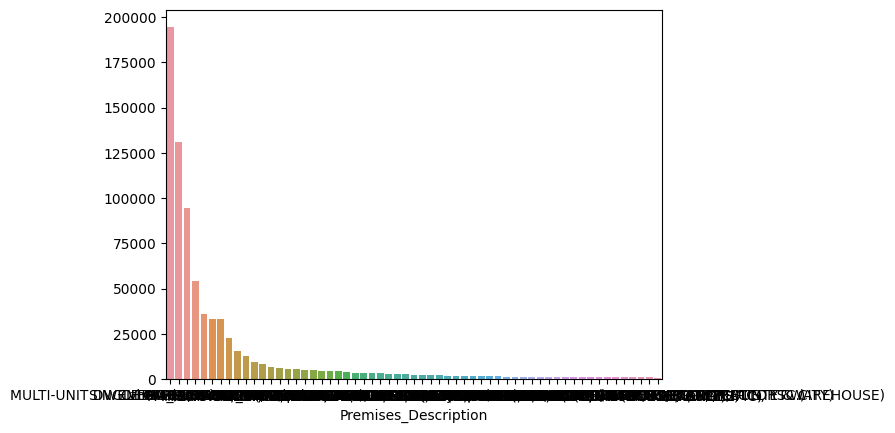

In [519]:
sns.barplot(x = bn.index, y = bn.values)

### handling skewed values of 

In [520]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,2,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan,Assault,Black
1,03:30,1,Central,2,Hispanic/Latin/Mexican,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,1,Hispanic/Latin/Mexican,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,1,Asian,STREET,ROCK/THROWN OBJECT,330.0,Saturday,Jan,Burglary,Asian
11,09:55,1,Central,2,Other,PARKING LOT,VERBAL THREAT,930.0,Sunday,Jan,Assault,Other_Victim_Descent
13,16:38,1,Central,1,Unknown,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,648.0,Tuesday,Jan,Arson,Unknown
15,07:30,19,Mission,2,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Monday,Nov,Assault,Hispanic/Latin/Mexican
16,20:18,11,Northeast,2,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Saturday,Nov,Assault,Hispanic/Latin/Mexican
17,19:00,5,Harbor,1,White,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,Saturday,Feb,Theft,White
19,13:30,1,Central,1,Black,ALLEY,FOLDING KNIFE,210.0,Tuesday,Jan,Robbery,Black
